### Data source: 

https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp?select=suicide+homicide+gdp.csv

https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv

https://www.kaggle.com/datasets/mathurinache/world-happiness-report


In [49]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [50]:
# loading data

df = pd.read_csv('suicide homicide gdp clean.csv')

In [51]:
df.head()

,Country,year,Homicides_per_100K,Suicides_per_100K,GINI,HAPP,GDPPC_avg,Region,incomeLevel
0,Afghanistan,2009,3.926774,4.4,NaN,NaN,1881.748742,Asia & Pacific,Low income
1,Afghanistan,2010,3.368110,4.3,NaN,NaN,1881.748742,Asia & Pacific,Low income
2,Afghanistan,2011,4.087337,4.1,NaN,NaN,1881.748742,Asia & Pacific,Low income
3,Afghanistan,2012,6.251328,4.0,NaN,NaN,1881.748742,Asia & Pacific,Low income
4,Afghanistan,2015,9.783922,4.0,NaN,3.575,1881.748742,Asia & Pacific,Low income


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3170 non-null   object 
 1   year                3170 non-null   int64  
 2   Homicides_per_100K  3170 non-null   float64
 3   Suicides_per_100K   3170 non-null   float64
 4   GINI                1455 non-null   float64
 5   HAPP                383 non-null    float64
 6   GDPPC_avg           3170 non-null   float64
 7   Region              3170 non-null   object 
 8   incomeLevel         3170 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 223.0+ KB


In [53]:
df.describe()

,year,Homicides_per_100K,Suicides_per_100K,GINI,HAPP,GDPPC_avg
count,3170.000000,3170.000000,3170.000000,1455.000000,383.000000,3170.000000
mean,2008.781073,8.657265,11.325489,35.908591,5.749433,17765.520852
std,5.171653,11.976538,8.960121,8.178881,1.066915,17123.139088
min,2000.000000,0.156318,0.200000,23.200000,2.905000,719.196191
25%,2004.000000,1.409837,5.200000,29.800000,5.127000,6334.322232
50%,2009.000000,3.728687,9.000000,34.000000,5.822000,12176.272004
75%,2013.000000,9.698203,14.400000,40.200000,6.572500,26605.402801
max,2018.000000,105.231189,92.400000,64.800000,7.632000,122389.946418


In [54]:
# defining bins and category names

bins = [719, 8600, 25417, 35015, 48000, 122389.95]
gname = ['Low', 'Mid-Low', 'Mid-High', 'High', 'Very High']
# add categories to column
df['incomeLevel'] = pd.cut(df.GDPPC_avg, bins, labels = gname)

In [55]:
df.head()

,Country,year,Homicides_per_100K,Suicides_per_100K,GINI,HAPP,GDPPC_avg,Region,incomeLevel
0,Afghanistan,2009,3.926774,4.4,NaN,NaN,1881.748742,Asia & Pacific,Low
1,Afghanistan,2010,3.368110,4.3,NaN,NaN,1881.748742,Asia & Pacific,Low
2,Afghanistan,2011,4.087337,4.1,NaN,NaN,1881.748742,Asia & Pacific,Low
3,Afghanistan,2012,6.251328,4.0,NaN,NaN,1881.748742,Asia & Pacific,Low
4,Afghanistan,2015,9.783922,4.0,NaN,3.575,1881.748742,Asia & Pacific,Low


In [56]:
calc = df.copy()

# Creating an instance of LabelEncoder
le = LabelEncoder()

# Transform the columns from text to numerical data
calc['Country'] = le.fit_transform(calc['Country'])
calc['Region'] = le.fit_transform(calc['Region'])
calc['incomeLevel'] = le.fit_transform(calc['incomeLevel'])

# creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=10)

# fit and transform the data
imputed_data = pd.DataFrame(imputer.fit_transform(calc))

In [57]:
# Imputing N/A values 

df['GINI'] = np.where(df['GINI'].isnull(), imputed_data[4], df['GINI'])
df['HAPP'] = np.where(df['HAPP'].isnull(), imputed_data[5], df['HAPP'])
df.head()

,Country,year,Homicides_per_100K,Suicides_per_100K,GINI,HAPP,GDPPC_avg,Region,incomeLevel
0,Afghanistan,2009,3.926774,4.4,39.02,3.8697,1881.748742,Asia & Pacific,Low
1,Afghanistan,2010,3.368110,4.3,39.02,3.8697,1881.748742,Asia & Pacific,Low
2,Afghanistan,2011,4.087337,4.1,39.02,3.8697,1881.748742,Asia & Pacific,Low
3,Afghanistan,2012,6.251328,4.0,39.02,3.8697,1881.748742,Asia & Pacific,Low
4,Afghanistan,2015,9.783922,4.0,39.02,3.5750,1881.748742,Asia & Pacific,Low


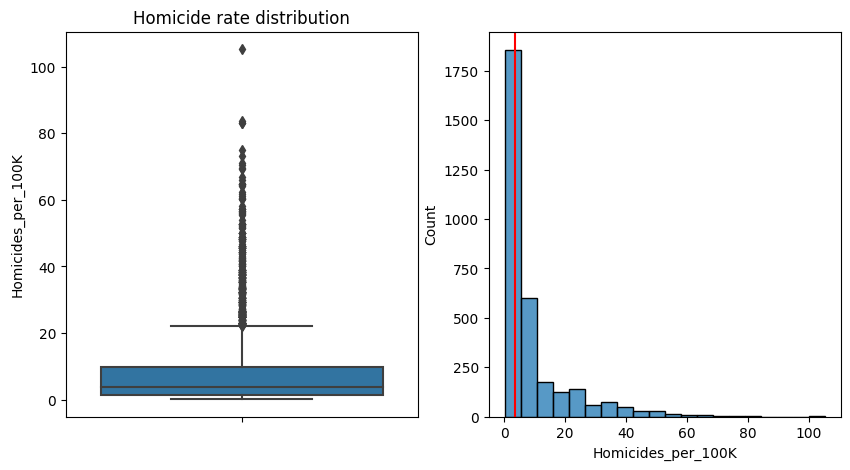

In [58]:
# plotting homicide data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Homicide rate distribution')
sns.boxplot(data=df, y='Homicides_per_100K', ax=axes[0])
sns.histplot(data=df, x='Homicides_per_100K', ax=axes[1], bins = 20)
plt.axvline(np.median(df['Homicides_per_100K']), color = 'r')

plt.show()

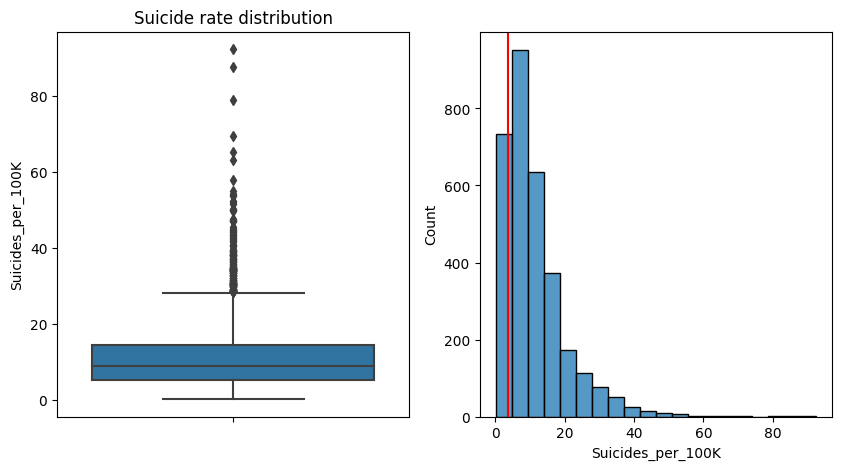

In [59]:
# plotting suicide data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Suicide rate distribution')
sns.boxplot(data=df, y='Suicides_per_100K', ax=axes[0])
sns.histplot(data=df, x='Suicides_per_100K', ax=axes[1], bins = 20)
plt.axvline(np.median(df['Homicides_per_100K']), color = 'r')

plt.show()

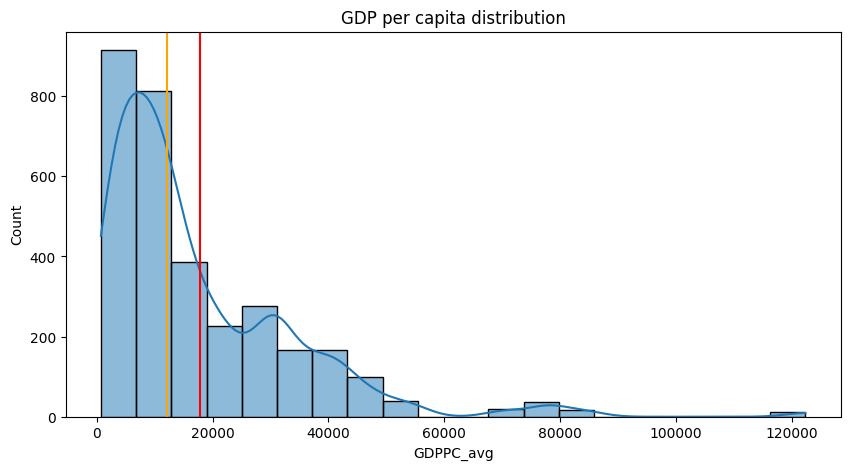

In [60]:
# Checking GDP distribution

plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'GDPPC_avg', kde = True, bins = 20).set(title='GDP per capita distribution')
plt.axvline(np.mean(df.GDPPC_avg), color = 'r')
plt.axvline(np.median(df.GDPPC_avg), color = 'orange')

plt.show()

### GDP distribution is left-skewed. There are outliers starting from 50000 USD per capita. We need to check these countries in different graph.

In [61]:
df.Country[df.GDPPC_avg >= 50000].unique()

array(['Brunei Darussalam', 'Kuwait', 'Luxembourg', 'Norway', 'Qatar',
       'Singapore', 'Switzerland', 'United Arab Emirates'], dtype=object)

In [62]:
# creating DataFrame for outliers

outl = df[df.GDPPC_avg >= 50000]

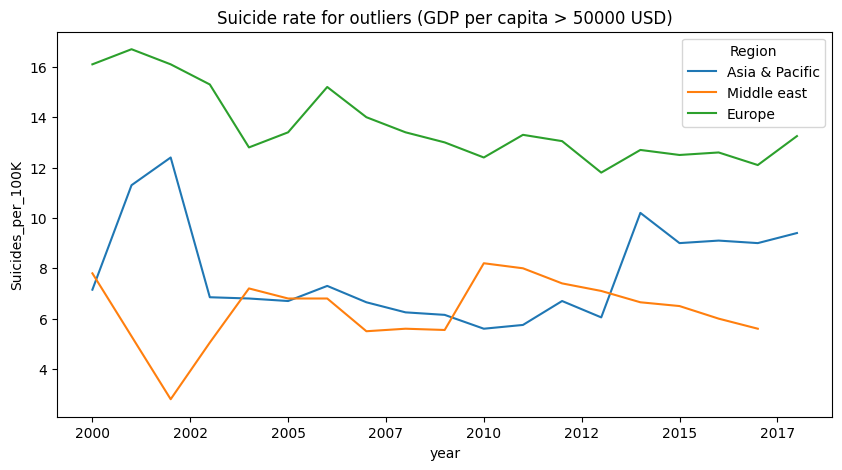

In [63]:
# plotting data

plt.figure(figsize=(10,5))
sns.lineplot(data = outl, x = 'year', y = 'Suicides_per_100K', hue = 'Region', errorbar=None, estimator = 'median').set(title='Suicide rate for outliers (GDP per capita > 50000 USD)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.show()

### European countries among outliers having highest level of suicides, while in Asia the peak there is a peak in 2014. In Middle East the level is lowest among the group and have tend to decrease starting from 2010.

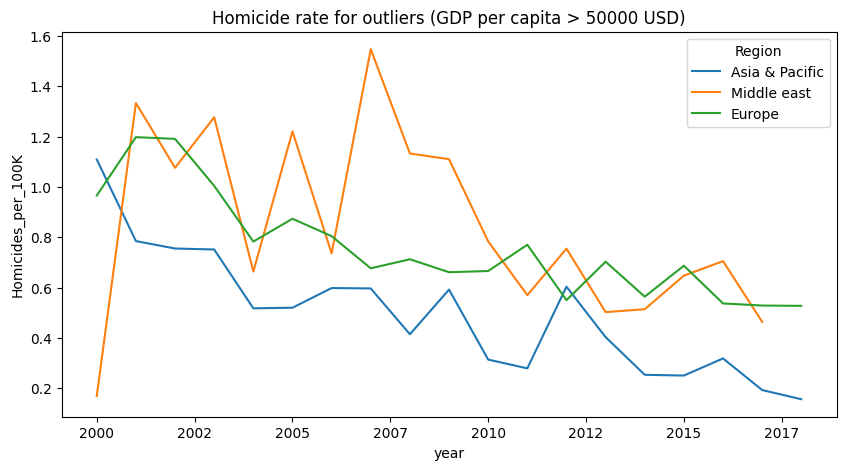

In [64]:
# plotting data

plt.figure(figsize=(10,5))
sns.lineplot(data = outl, x = 'year', y = 'Homicides_per_100K', hue = 'Region', errorbar=None, estimator = 'median').set(title='Homicide rate for outliers (GDP per capita > 50000 USD)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))

plt.show()

### Countries with high GDP per capita level have gradual increase of suicides starting from 2006. For countries with low and very high level pattern over time seems to be almost identical with minimum level in 2012.

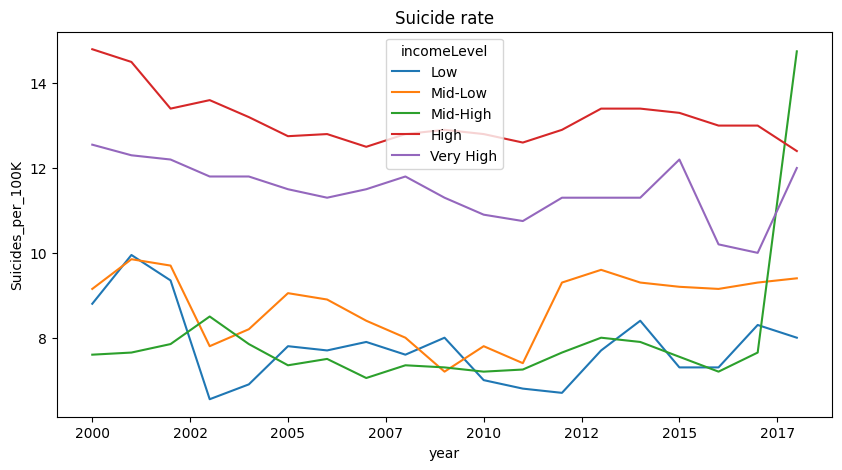

In [68]:
# plotting data

plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'year', y = 'Suicides_per_100K', hue = 'incomeLevel', errorbar=None, estimator='median').set(title='Suicide rate')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))

plt.show()

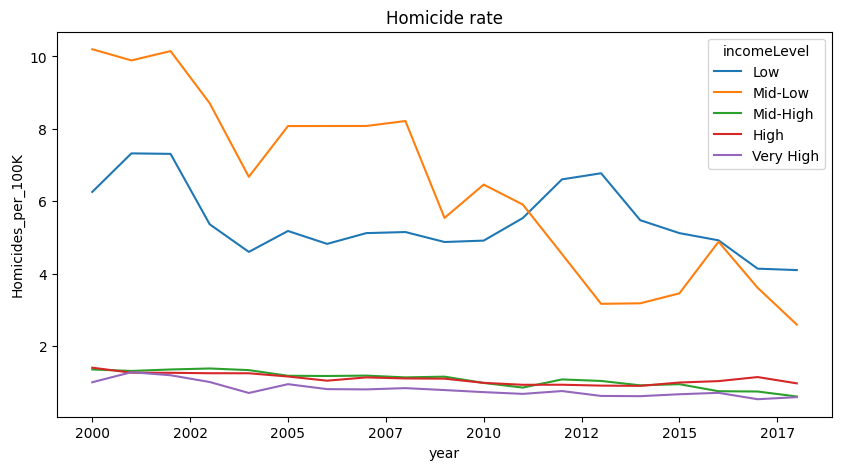

In [69]:
# plotting data

plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'year', y = 'Homicides_per_100K', hue = 'incomeLevel', errorbar=None, estimator='median').set(title='Homicide rate')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))

plt.show()

# 
For countries having GDP per capita starting from Mid-high, Homicide rate is very low and stable.  

## Bivariate analysis

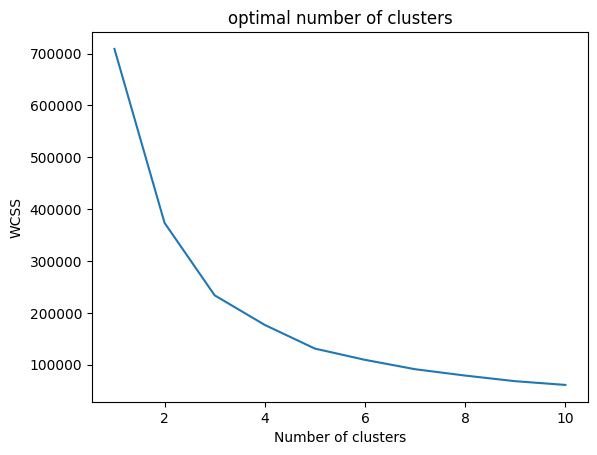

In [94]:

# Calculate the within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df[['Homicides_per_100K', 'Suicides_per_100K']])
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares versus k
plt.plot(range(1, 11), wcss)
plt.title('optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



# Create an instance of the classifier
kmeans = KMeans(n_clusters=3, n_init=20)

# Fit the classifier to the data
kmeans.fit(df[['Homicides_per_100K', 'Suicides_per_100K']])

# Predict the cluster labels for the provided data
df['predicted_labels'] = kmeans.predict(df[['Homicides_per_100K', 'Suicides_per_100K']])
df['predicted_labels'] = df['predicted_labels'].map({0:' peaceful', 1:'violent group', 2:'violent & suicidal group'})


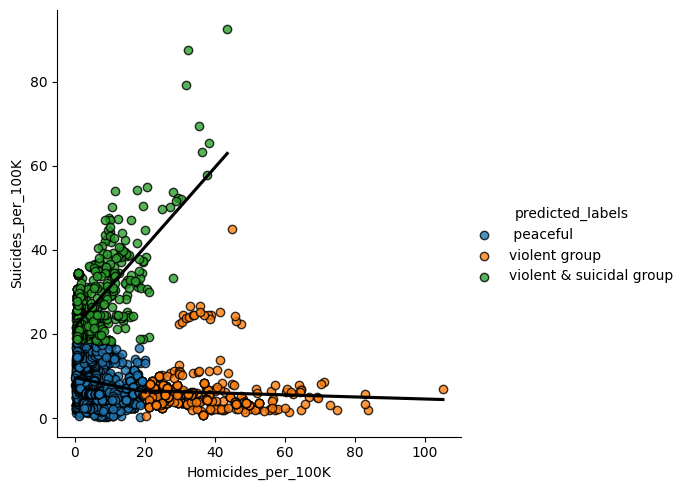

In [125]:
# plotting data

sns.lmplot(data = df, x = 'Homicides_per_100K', y = 'Suicides_per_100K', hue = 'predicted_labels', ci = None, line_kws={'color': 'black'}, scatter_kws={'edgecolor': 'black'})

plt.show()

In [128]:
# Filtering the data
filtered_data = df[df['predicted_labels'] == "violent & suicidal group"]

# Calculate the Spearman's rank correlation coefficient
spearmanr(filtered_data['Suicides_per_100K'], filtered_data['Homicides_per_100K'])


SignificanceResult(statistic=0.32717847890776297, pvalue=2.4448612442899343e-13)

In [96]:
df.loc[df['predicted_labels'] == "violent & suicidal group", 'Country'].unique()

array(['Austria', 'Belarus', 'Belgium', 'Botswana', 'Croatia', 'Estonia',
       'Eswatini', 'Finland', 'France', 'Guyana', 'Hungary', 'Japan',
       'Kazakhstan', 'Kiribati', 'Korea, Rep.', 'Latvia', 'Lesotho',
       'Lithuania', 'Moldova', 'Mongolia', 'Montenegro', 'Namibia',
       'Poland', 'Russian Federation', 'Serbia', 'Slovenia', 'Sri Lanka',
       'Suriname', 'Switzerland', 'Ukraine', 'Uruguay', 'Zimbabwe'],
      dtype=object)

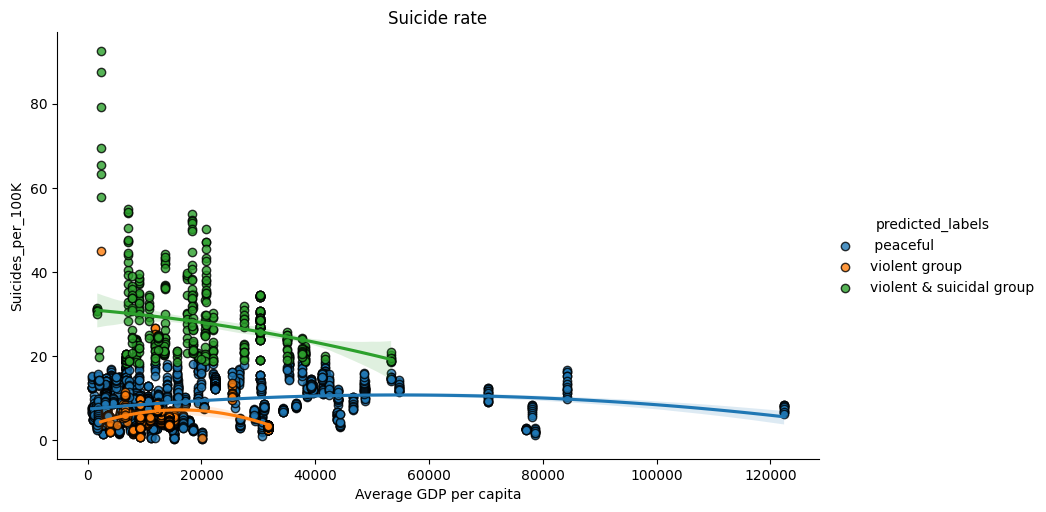

In [97]:
# Checking the distribution among the gpd rate per capita

sns.lmplot(data = df, x = 'GDPPC_avg', y = 'Suicides_per_100K', order = 2, height=5, aspect=1.7, hue = 'predicted_labels', scatter_kws={'edgecolor': 'black'}).set(title='Suicide rate')
plt.xlabel('Average GDP per capita')

plt.show()

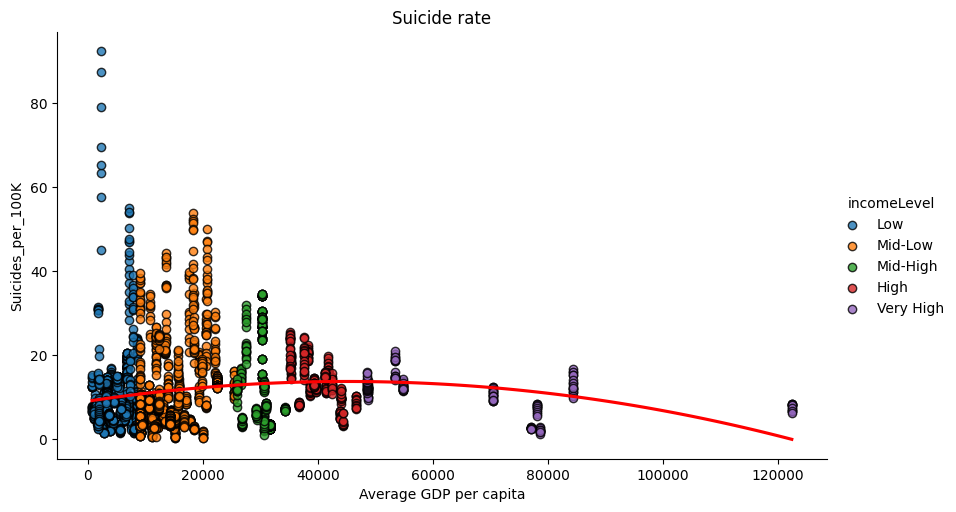

In [98]:
# Checking the distribution among the gpd rate per capita

sns.lmplot(data = df, x = 'GDPPC_avg', y = 'Suicides_per_100K', order = 2, ci = None, height=5, aspect=1.7, hue = 'incomeLevel', fit_reg=False, scatter_kws={'edgecolor': 'black'}).set(title='Suicide rate')
sns.regplot(data = df, x = 'GDPPC_avg', y = 'Suicides_per_100K', order = 2, ci = None, scatter=False, color='r')

plt.xlabel('Average GDP per capita')
plt.show()

In [99]:
spearmanr(df.GDPPC_avg, df.Suicides_per_100K)

SignificanceResult(statistic=0.196910123384845, pvalue=4.4648646268516626e-29)

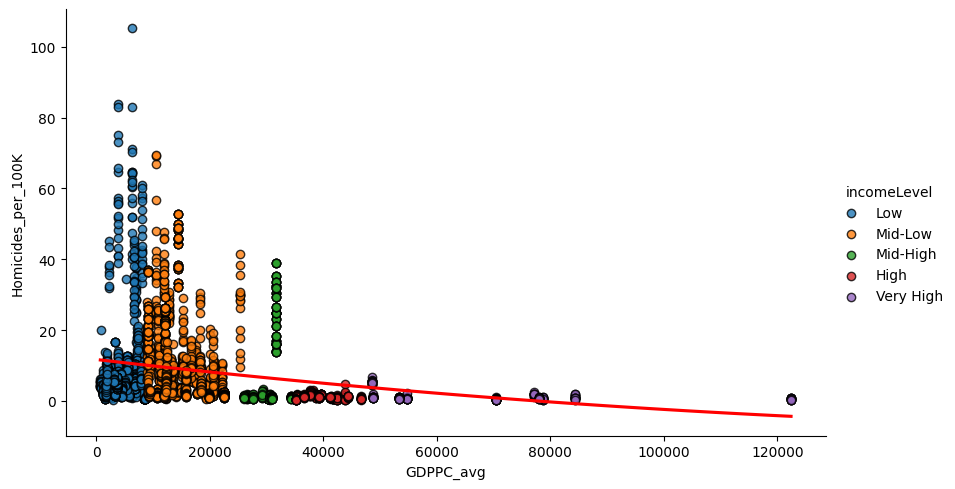

In [100]:
# Checking the distribution among the gpd rate per capita

sns.lmplot(data = df, x = 'GDPPC_avg', y = 'Homicides_per_100K', order = 2, ci = None, height=5, aspect=1.7, hue = 'incomeLevel', fit_reg=False, scatter_kws={'edgecolor': 'black'})
sns.regplot(data = df, x = 'GDPPC_avg', y = 'Homicides_per_100K', order = 2, ci = None, scatter=False, color='r')
plt.show()

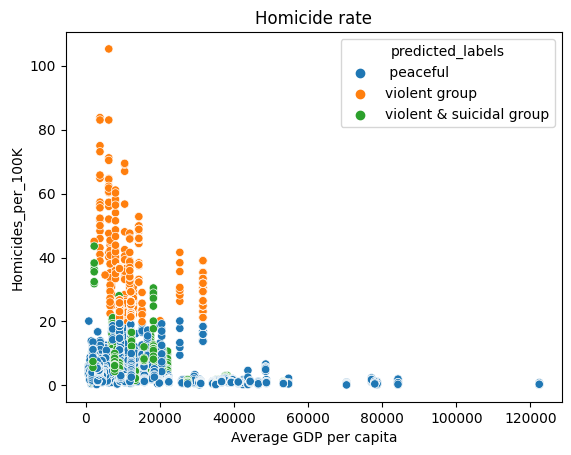

In [101]:
# Checking the distribution among the gpd rate per capita

sns.scatterplot(data = df, x = 'GDPPC_avg', y = 'Homicides_per_100K', hue = 'predicted_labels').set(title='Homicide rate')
plt.xlabel('Average GDP per capita')

plt.show()

In [102]:
spearmanr(df.GDPPC_avg, df.Homicides_per_100K)

SignificanceResult(statistic=-0.40325680042485157, pvalue=2.8697843692029562e-124)

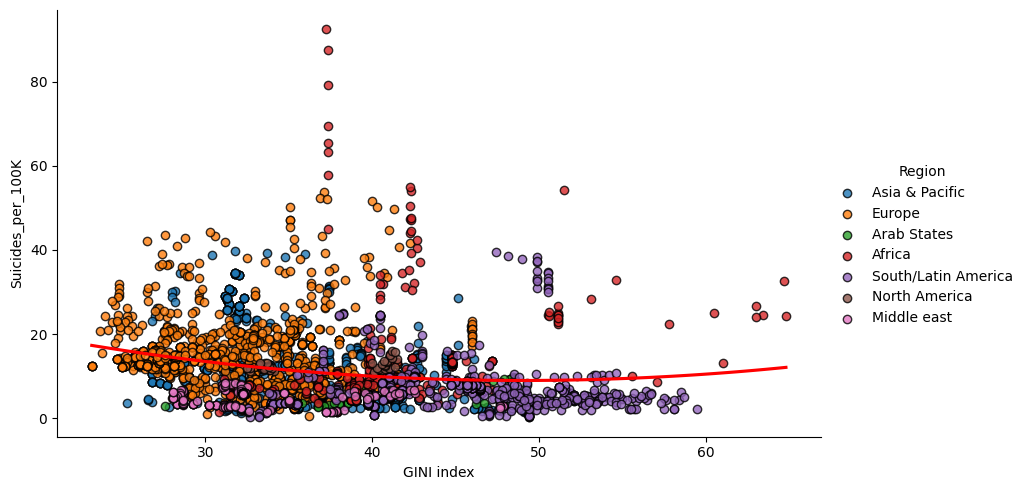

In [104]:
# Checking the correlation among the regions

sns.lmplot(data = df, x = 'GINI', y = 'Suicides_per_100K', order = 1, ci = None, hue = 'Region', height=5, aspect=1.7, fit_reg=False, scatter_kws={'edgecolor': 'black'})
sns.regplot(data = df, x = 'GINI', y = 'Suicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('GINI index')

plt.show()

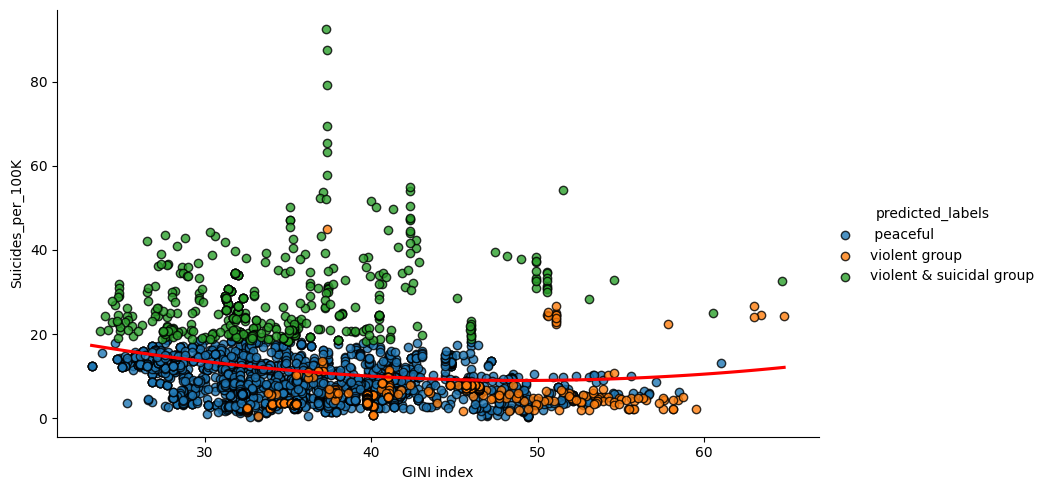

In [105]:
# Checking the correlation among the regions

sns.lmplot(data = df, x = 'GINI', y = 'Suicides_per_100K', order = 1, ci = None, hue = 'predicted_labels', height=5, aspect=1.7, fit_reg=False, scatter_kws={'edgecolor': 'black'})
sns.regplot(data = df, x = 'GINI', y = 'Suicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('GINI index')

plt.show()

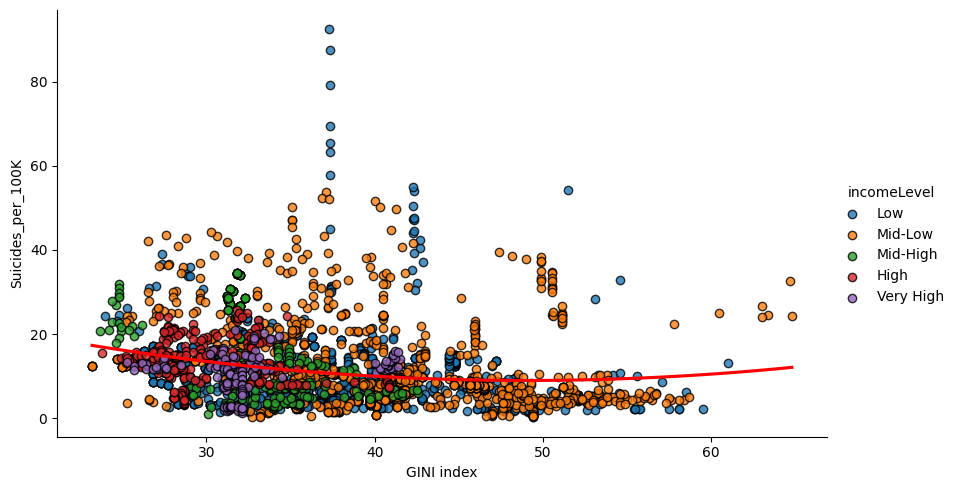

In [106]:
# Checking the correlation among the gpd rate per capita

sns.lmplot(data = df, x = 'GINI', y = 'Suicides_per_100K', order = 1, ci = None, hue = 'incomeLevel', height=5, aspect=1.7, fit_reg=False, scatter_kws={'edgecolor': 'black'})
sns.regplot(data = df, x = 'GINI', y = 'Suicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('GINI index')

plt.show()

In [107]:
spearmanr(df.GINI, df.Suicides_per_100K)

SignificanceResult(statistic=-0.2775669293268943, pvalue=3.578214878439712e-57)

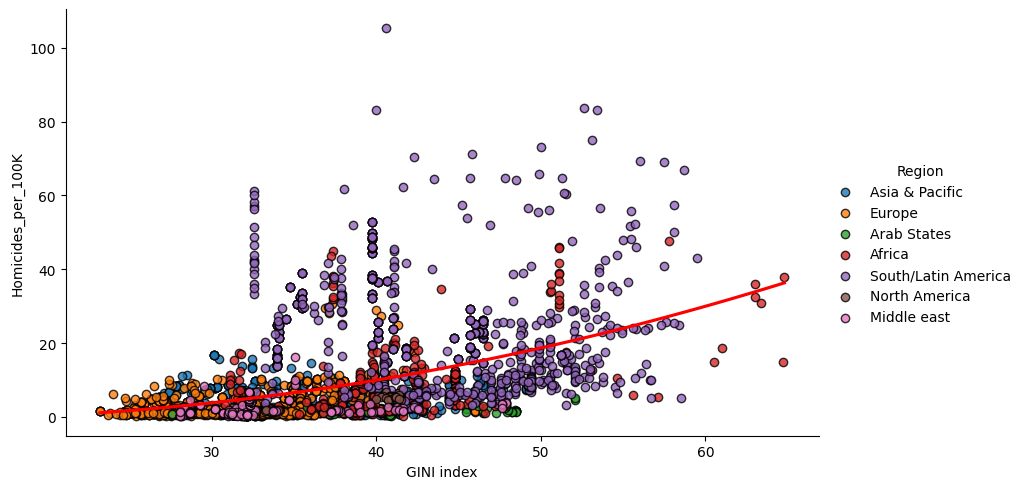

In [108]:
# Checking the correlation among the regions

sns.lmplot(data = df, x = 'GINI', y = 'Homicides_per_100K', order = 1, ci = None, hue = 'Region', height=5, aspect=1.7, fit_reg=False, scatter_kws={'edgecolor': 'black'})
sns.regplot(data = df, x = 'GINI', y = 'Homicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('GINI index')

plt.show()

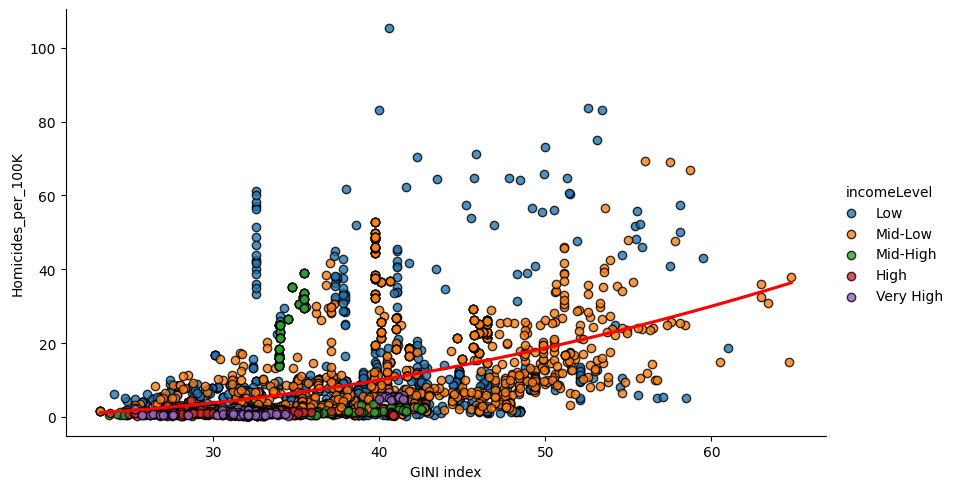

In [109]:
# Checking the correlation among the gpd rate per capita

sns.lmplot(data = df, x = 'GINI', y = 'Homicides_per_100K', order = 1, ci = None, hue = 'incomeLevel', height=5, aspect=1.7, fit_reg=False, scatter_kws={'edgecolor': 'black'})
sns.regplot(data = df, x = 'GINI', y = 'Homicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('GINI index')

plt.show()

In [ ]:
spearmanr(df2.GINI, df2.Homicides_per_100K)

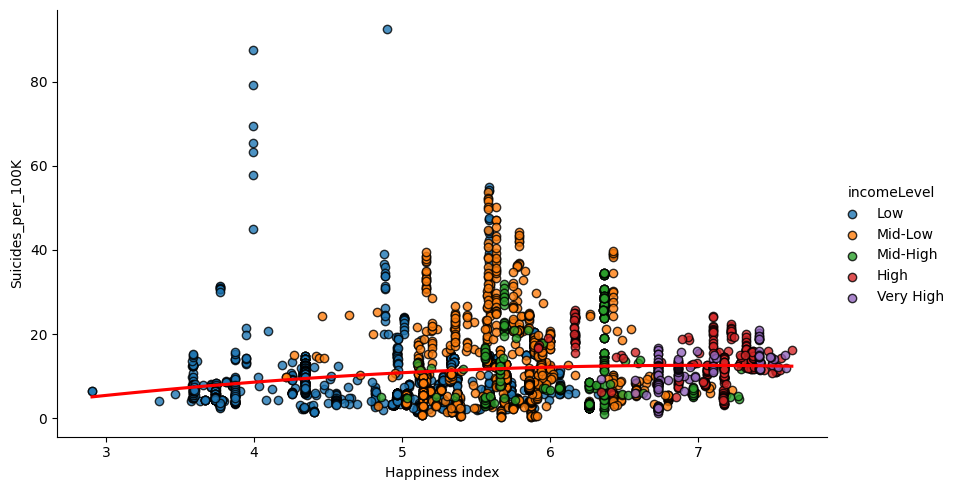

In [111]:
# Checking the correlation among the gpd rate per capita

sns.lmplot(data = df, x = 'HAPP', y = 'Suicides_per_100K', order = 2, ci = None, hue = 'incomeLevel', height=5, aspect=1.7, fit_reg=False, scatter_kws={'edgecolor': 'black'})
sns.regplot(data = df, x = 'HAPP', y = 'Suicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('Happiness index')

plt.show()

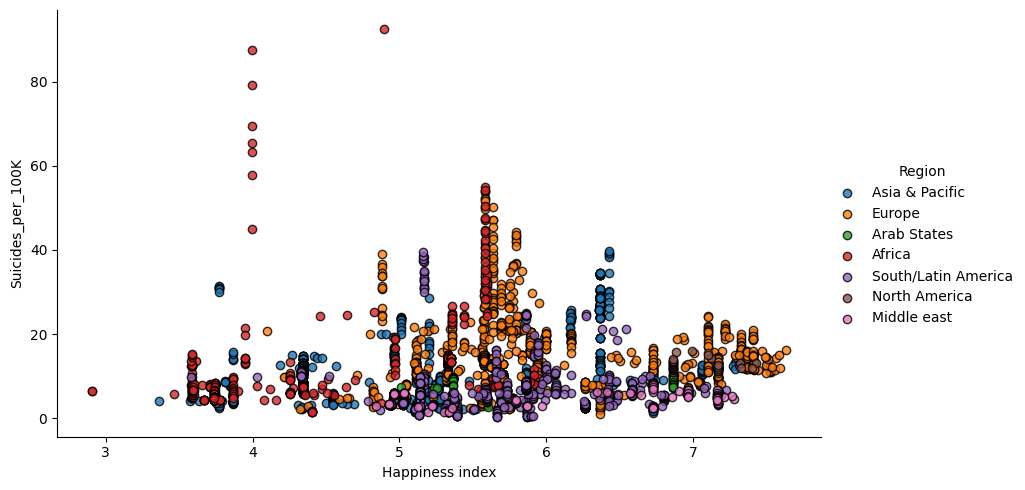

In [113]:
# Checking the correlation among the regions

sns.lmplot(data = df, x = 'HAPP', y = 'Suicides_per_100K', order = 1, ci = None, hue = 'Region', height=5, aspect=1.7, scatter_kws={'edgecolor': 'black'}, fit_reg=False)
plt.xlabel('Happiness index')

plt.show()

In [114]:
spearmanr(df.HAPP, df.Suicides_per_100K)

SignificanceResult(statistic=0.22302093423127106, pvalue=5.060935114381452e-37)

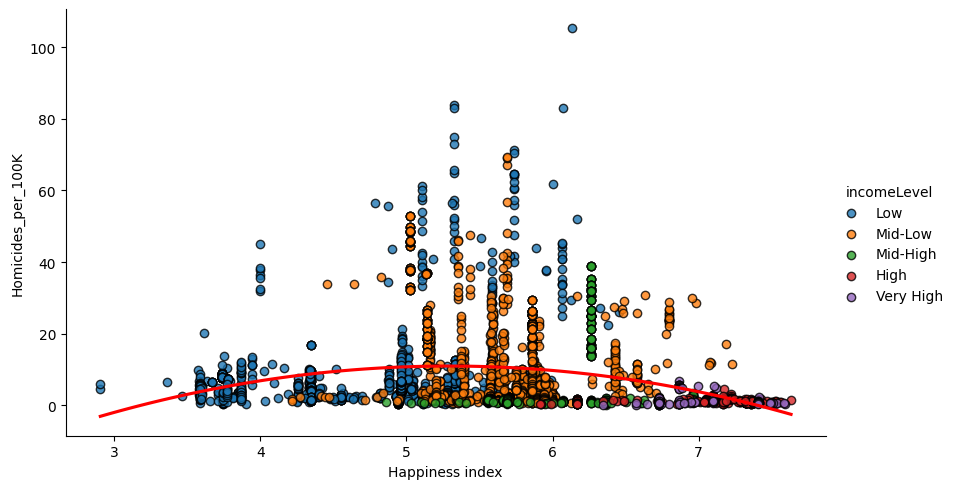

In [115]:
# Checking the correlation among the gpd rate per capita

sns.lmplot(data = df, x = 'HAPP', y = 'Homicides_per_100K', order = 2, ci = None, hue = 'incomeLevel', height=5, aspect=1.7, fit_reg=False, scatter_kws={'edgecolor': 'black'})
sns.regplot(data = df, x = 'HAPP', y = 'Homicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('Happiness index')
plt.xlabel('Happiness index')

plt.show()

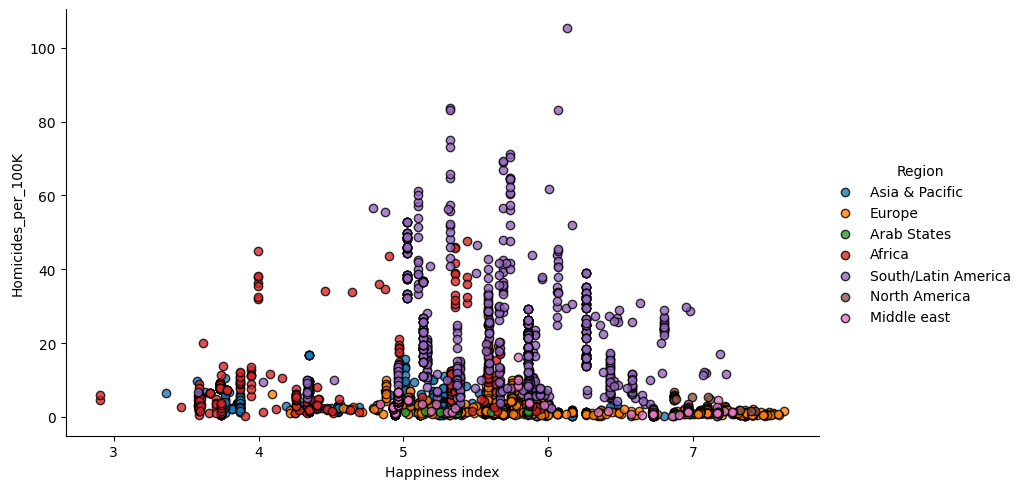

In [116]:
# Checking the correlation among the regions

sns.lmplot(data = df, x = 'HAPP', y = 'Homicides_per_100K', order = 1, ci = None, hue = 'Region', height=5, aspect=1.7, scatter_kws={'edgecolor': 'black'},fit_reg=False)
plt.xlabel('Happiness index')

plt.show()

In [117]:
spearmanr(df.HAPP, df.Homicides_per_100K)

SignificanceResult(statistic=-0.29482404427146036, pvalue=1.3353431022656927e-64)

In [118]:
# checking outliers

In [122]:
print(df['Country'][df.Suicides_per_100K > 30].unique())

['Belarus' 'Botswana' 'Estonia' 'Eswatini' 'Guyana' 'Hungary' 'Kazakhstan'
 'Kiribati' 'Korea, Rep.' 'Latvia' 'Lesotho' 'Lithuania'
 'Russian Federation' 'Slovenia' 'Ukraine']


In [124]:
print(df['Country'][df.Homicides_per_100K > 40].unique())

['Belize' 'Colombia' 'El Salvador' 'Guatemala' 'Honduras' 'Jamaica'
 'Lesotho' 'South Africa' 'Trinidad and Tobago' 'Venezuela, RB']


In [129]:
#Save to csv 
df.to_csv('suic_clean.csv', index = False)